In [1]:
# Tomato Leaf Disease Detection

# In this program I will build 3 differnt CNN models to find maximum accuracy.
# I will then build two transfer learning model approaches namely Incpetion-V3 and VGG-16

# Then, I will do the testing with the model from which we obtain highest accuracy.

# Code I: I have used one FC layer with batch size = default
# CodeII: I have used two FC layer with batch size = default
# Code III: I have used one FC layer with batch size = 64

In [2]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
# Importing the images 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/BTP_Dataset/tomato.zip','r') as zipObj:
  zipObj.extractall('/content/drive/MyDrive/BTP_Dataset/dataset')

In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/BTP_Dataset/dataset/tomato/train/',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

Found 10000 images belonging to 10 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/BTP_Dataset/dataset/tomato/val/',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

Found 1000 images belonging to 10 classes.


## Creating the first CNN model

In [ ]:
# First model

from keras.layers import BatchNormalization
from keras.layers import Dropout

cnn = tf.keras.models.Sequential()

#Convolution layer 1
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))
# cnn.add(BatchNormalization())

# Pooling 1
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# cnn.add(BatchNormalization())

#Convolution layer 2
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))
# cnn.add(Dropout(0.25))

# cnn.add(BatchNormalization())

# Pooling 2
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# cnn.add(BatchNormalization())

# Flattening
cnn.add(tf.keras.layers.Flatten())
# cnn.add(BatchNormalization())

#Full Connection
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
# cnn.add(BatchNormalization())

#Output Layer
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

#Compiling
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Summary of the model
cnn.summary()

# Fit
temp = cnn.fit(x = train_generator, validation_data=test_generator,epochs=25)



Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_164 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_165 (Conv2D)         (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 41472)             0         
                                                                 
 dense_31 (Dense)            (None, 128)             

In [ ]:
# Scores is just a list containing loss and accuracy value
scores=cnn.evaluate(train_generator)
scores2=cnn.evaluate(test_generator)
print("Training Loss is :"+str(scores[0]))
print("Validation Loss is :"+str(scores2[0]))
print("Validation Accuracy is :"+str(scores2[1]*100)+" %")

32/32 [==============================] - 3s 83ms/step - loss: 0.1067 - accuracy: 0.8560
Training Loss is :0.016778936609625816
Training Accuracy is :98.11999797821045 %
Testing Loss is :0.10669023543596268
Testing Accuracy is :85.6000006198883 %


In [ ]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = cnn.predict(test_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes and class Labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   

## Classification Report

In [ ]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.18      0.06      0.09       100
                        Tomato___Early_blight       0.03      0.01      0.01       100
                         Tomato___Late_blight       0.05      0.04      0.04       100
                           Tomato___Leaf_Mold       0.09      0.05      0.06       100
                  Tomato___Septoria_leaf_spot       0.11      0.30      0.16       100
Tomato___Spider_mites Two-spotted_spider_mite       0.07      0.05      0.06       100
                         Tomato___Target_Spot       0.15      0.18      0.17       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.14      0.10      0.12       100
                 Tomato___Tomato_mosaic_virus       0.07      0.10      0.09       100
                             Tomato___healthy       0.07      0.08      0.07       100

                                     accu

## Confusion Matrix

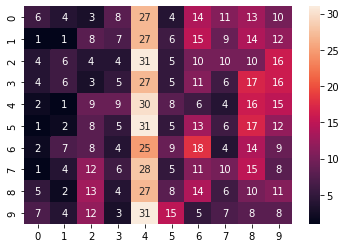

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(true_classes,predicted_classes),annot=True,fmt='.5g') 

In [ ]:
# Testing the model
from keras.preprocessing import image
test = image.load_img("/content/drive/MyDrive/BTP_Dataset/dataset/tomato/val/Tomato___Spider_mites Two-spotted_spider_mite/00fa99e8-2605-4d72-be69-98277587d84b___Com.G_SpM_FL 1453.JPG",target_size = (150, 150))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=cnn.predict(test)

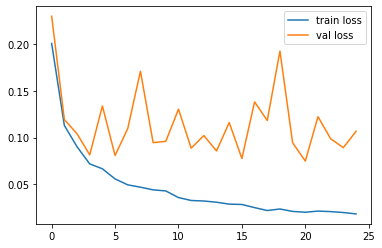

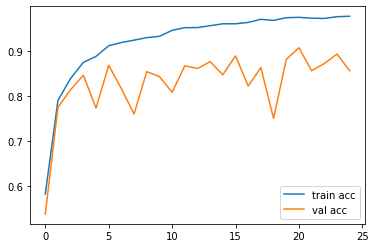

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(temp.history['loss'], label='train loss')
plt.plot(temp.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(temp.history['accuracy'], label='train acc')
plt.plot(temp.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
result

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## CNN Model-2

In [7]:
# Second model

from keras.layers import BatchNormalization
from keras.layers import Dropout

cnn2 = tf.keras.models.Sequential()

#Convolution layer 1
cnn2.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))
# cnn2.add(BatchNormalization())

# Pooling 1
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# cnn2.add(BatchNormalization())

#Convolution layer 2
cnn2.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))
# cnn2.add(BatchNormalization())

# Pooling 2
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#cnn2.add(Dropout(0.25))
# cnn2.add(BatchNormalization())

# Flattening
cnn2.add(tf.keras.layers.Flatten())

#Full Conncetion
cnn2.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn2.add(BatchNormalization())

#Full Conncetion
cnn2.add(tf.keras.layers.Dense(units=128,activation='relu'))
# cnn2.add(BatchNormalization())

#Output Layer
cnn2.add(tf.keras.layers.Dense(units=10,activation='softmax'))

#Compiling
cnn2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Summary of the model
cnn2.summary()

# Fit
temp = cnn2.fit(x = train_generator, validation_data=test_generator,epochs=25)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [8]:
# Scores is just a list containing loss and accuracy value
scores=cnn2.evaluate(train_generator)
scores2=cnn2.evaluate(test_generator)
print("Training Loss is :"+str(scores[0]))
print("Training Accuracy is :"+str(scores[1]*100)+" %")
print("Validation Loss is :"+str(scores2[0]))
print("Validation Accuracy is :"+str(scores2[1]*100)+" %")

32/32 [==============================] - 4s 128ms/step - loss: 0.1509 - accuracy: 0.8030
Training Loss is :0.05408862978219986
Training Accuracy is :91.17000102996826 %
Testing Loss is :0.1509012132883072
Testing Accuracy is :80.29999732971191 %


In [9]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = cnn2.predict(test_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes and class Labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   

In [10]:
#Classification Report
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.06      0.06      0.06       100
                        Tomato___Early_blight       0.12      0.08      0.09       100
                         Tomato___Late_blight       0.11      0.10      0.10       100
                           Tomato___Leaf_Mold       0.10      0.04      0.06       100
                  Tomato___Septoria_leaf_spot       0.11      0.17      0.13       100
Tomato___Spider_mites Two-spotted_spider_mite       0.15      0.14      0.14       100
                         Tomato___Target_Spot       0.11      0.16      0.13       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.09      0.07      0.08       100
                 Tomato___Tomato_mosaic_virus       0.10      0.12      0.11       100
                             Tomato___healthy       0.07      0.07      0.07       100

                                     accu

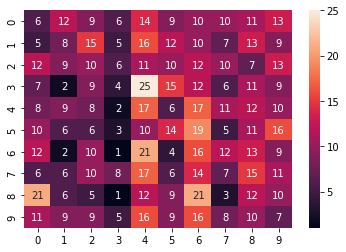

In [11]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(true_classes,predicted_classes),annot=True,fmt='.5g') 

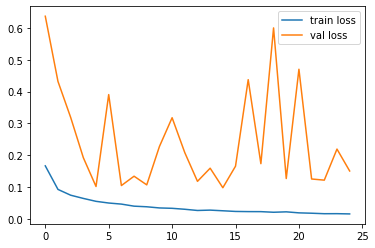

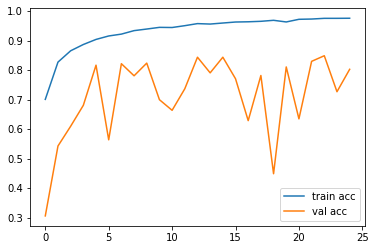

<Figure size 432x288 with 0 Axes>

In [12]:
# plot the loss
plt.plot(temp.history['loss'], label='train loss')
plt.plot(temp.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(temp.history['accuracy'], label='train acc')
plt.plot(temp.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## CNN Model-3 

In [13]:
# Third model

from keras.layers import BatchNormalization
from keras.layers import Dropout

cnn3 = tf.keras.models.Sequential()

#Convolution layer 1
cnn3.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))
# cnn3.add(BatchNormalization())

# Pooling 1
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# cnn3.add(BatchNormalization())

#Convolution layer 2
cnn3.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))
# cnn3.add(BatchNormalization())

# Pooling 2
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# cnn3.add(BatchNormalization())

# Flattening
cnn3.add(tf.keras.layers.Flatten())
# cnn3.add(BatchNormalization())

#Full Conncetion
cnn3.add(tf.keras.layers.Dense(units=128,activation='relu'))
# cnn3.add(Dropout(0.25))

#Output Layer
cnn3.add(tf.keras.layers.Dense(units=10,activation='softmax'))

#Compiling
cnn3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Summary of the model
cnn3.summary()

# Fit
temp = cnn3.fit(x = train_generator, validation_data=test_generator,epochs=25,batch_size = 64)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 41472)             0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [14]:
# Scores is just a list containing loss and accuracy value
scores=cnn3.evaluate(train_generator)
scores2=cnn3.evaluate(test_generator)
print("Training Loss is :"+str(scores[0]))
print("Training Accuracy is :"+str(scores[1]*100)+" %")
print("Validation Loss is :"+str(scores2[0]))
print("Validation Accuracy is :"+str(scores2[1]*100)+" %")

32/32 [==============================] - 4s 123ms/step - loss: 0.1457 - accuracy: 0.8160
Training Loss is :0.017557254061102867
Training Accuracy is :97.64000177383423 %
Testing Loss is :0.14565490186214447
Testing Accuracy is :81.5999984741211 %


In [15]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = cnn3.predict(test_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes and class Labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   

In [16]:
#Classification Report
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.07      0.06      0.07       100
                        Tomato___Early_blight       0.05      0.06      0.05       100
                         Tomato___Late_blight       0.15      0.14      0.14       100
                           Tomato___Leaf_Mold       0.12      0.11      0.11       100
                  Tomato___Septoria_leaf_spot       0.10      0.11      0.10       100
Tomato___Spider_mites Two-spotted_spider_mite       0.04      0.03      0.04       100
                         Tomato___Target_Spot       0.07      0.07      0.07       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.07      0.06      0.07       100
                 Tomato___Tomato_mosaic_virus       0.13      0.14      0.13       100
                             Tomato___healthy       0.13      0.18      0.15       100

                                     accu

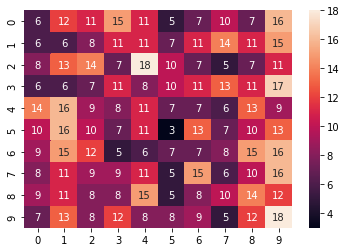

In [17]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(true_classes,predicted_classes),annot=True,fmt='.5g') 

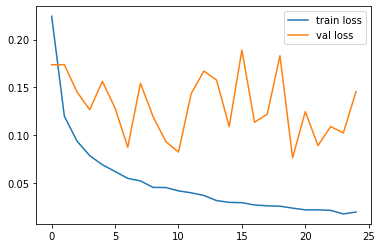

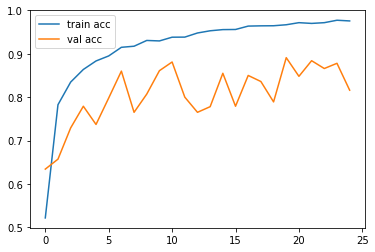

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(temp.history['loss'], label='train loss')
plt.plot(temp.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(temp.history['accuracy'], label='train acc')
plt.plot(temp.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## Inception-V3

## Detection of Tomato Leaf Disease by Transfer learning InceptionV3

#### Importing libraries and essentials for the model

In [19]:
from tensorflow import keras 
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

##### Data Augmentation

Increasing the data by horizontal flip, shear range and rotation range to get the image classification better accuracy.
Data augmentation is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data.

In [20]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=True,rotation_range=.2,shear_range=.2)
test_datagen=ImageDataGenerator(rescale=1./255)

##### About Dataset

   1. The dataset consists of training data, and validation data.
   2. The training data consists of 18345  images with 10 classes and 3,875 test images with 10.
   3. The classes are Tomato___Bacterial_spot, Tomato___Early_blight, Tomato___healthy, Tomato___Late_blight, Tomato___Leaf_Mold, Tomato___Septoria_leaf_spot, Tomato___Spider_mites Two-spotted_spider_mite, Tomato___Target_Spot, Tomato___Tomato_mosaic_virus, Tomato___Tomato_Yellow_Leaf_Curl_Virus.

In [21]:
training_set=train_datagen.flow_from_directory("/content/drive/MyDrive/BTP_Dataset/dataset/tomato/train/",
                                               target_size=(224,224),class_mode="categorical",batch_size=32,shuffle=True)
test_set=test_datagen.flow_from_directory("/content/drive/MyDrive/BTP_Dataset/dataset/tomato/val/",
                                          target_size=(224,224),class_mode="categorical",batch_size=32,shuffle=True)

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


### InceptionV3

Inception v3 is a convolutional neural network for assisting in image analysis and object detection, and got its start as a module for Googlenet. It is the third edition of Google's Inception Convolutional Neural Network, originally introduced during the ImageNet Recognition Challenge. Just as ImageNet can be thought of as a database of classified visual objects, Inception helps classification of objects in the world of computer vision.


In [22]:
inception=InceptionV3(input_shape=[224,224,3],weights="imagenet",include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


**We will not train the layers because the layers of InceptionV3 layers are already trained with imagenet dataset.** 

In [23]:
for layer in inception.layers:
  layer.trainable=False

In [24]:
folder=glob("/content/drive/MyDrive/BTP_Dataset/dataset/tomato/train/*")

**Adding a flatten layer along with a Dense layer whose neuron will be equal to the number of classes with and activation funtion softmax**

**Then we will concat the model and name inception_model**

In [25]:
x=Flatten()(inception.output)
predict_inception=Dense(units=len(folder),activation="softmax")(x)
inception_model=Model(inputs=inception.input,outputs=predict_inception)

**We have taken the optimizer Adam and the loss will be categorical crossentropy and our aim will be to find the accuracy**

In [26]:
inception_model.compile(optimizer="adam",
                        loss="categorical_crossentropy",metrics=["accuracy"])

#### Final Architecture

In [27]:
inception_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 111, 111, 32  96         ['conv2d_4[0][0]']               
 rmalization)                   )                                                             

In [28]:
transfer_inception=inception_model.fit_generator(training_set,validation_data=test_set,
                                                 validation_steps=len(test_set),steps_per_epoch=len(training_set),epochs=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
313/313 [==============================] - 181s 555ms/step - loss: 2.7637 - accuracy: 0.6696 - val_loss: 2.0916 - val_accuracy: 0.7340
Epoch 2/20
313/313 [==============================] - 173s 553ms/step - loss: 1.5532 - accuracy: 0.8069 - val_loss: 2.9209 - val_accuracy: 0.7400
Epoch 3/20
313/313 [==============================] - 180s 575ms/step - loss: 1.3476 - accuracy: 0.8427 - val_loss: 3.8444 - val_accuracy: 0.7210
Epoch 4/20
313/313 [==============================] - 174s 554ms/step - loss: 1.2378 - accuracy: 0.8665 - val_loss: 3.1826 - val_accuracy: 0.7770
Epoch 5/20
313/313 [==============================] - 174s 555ms/step - loss: 0.7772 - accuracy: 0.9047 - val_loss: 3.0442 - val_accuracy: 0.7820
Epoch 6/20
313/313 [==============================] - 183s 584ms/step - loss: 0.8158 - accuracy: 0.9082 - val_loss: 3.7090 - val_accuracy: 0.7770
Epoch 7/20
313/313 [==============================] - 196s 626ms/step - loss: 0.7068 - accuracy: 0.9189 - val_loss: 2.6559 -

After training the model I have noticed that the model is **Overfiiting.**

**Overfitting means for training dataset the model perform good but for test dataset the model will not perform well.**  

In [46]:
# Scores is just a list containing loss and accuracy value
scores=inception_model.evaluate(training_set)
scores2=inception_model.evaluate(test_set)
print("Training Loss is :"+str(scores[0]))
print("Training Accuracy is :"+str(scores[1]*100)+" %")
print("Validation Loss is :"+str(scores2[0]))
print("Validation Accuracy is :"+str(scores2[1]*100)+" %")

20/20 [==============================] - 5s 253ms/step - loss: 5.6498 - accuracy: 0.7980
Training Loss is :0.6275352835655212
Training Accuracy is :95.49000263214111 %
Validation Loss is :5.6497955322265625
Validation Accuracy is :79.79999780654907 %


In [47]:
test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)
predictions = inception_model.predict(test_set, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes and class Labels
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())   

In [48]:
#Classification Report
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.08      0.08      0.08       100
                        Tomato___Early_blight       0.12      0.11      0.11       100
                         Tomato___Late_blight       0.13      0.10      0.11       100
                           Tomato___Leaf_Mold       0.07      0.10      0.08       100
                  Tomato___Septoria_leaf_spot       0.06      0.05      0.05       100
Tomato___Spider_mites Two-spotted_spider_mite       0.13      0.18      0.15       100
                         Tomato___Target_Spot       0.05      0.05      0.05       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.13      0.12      0.13       100
                 Tomato___Tomato_mosaic_virus       0.06      0.06      0.06       100
                             Tomato___healthy       0.13      0.10      0.11       100

                                     accu

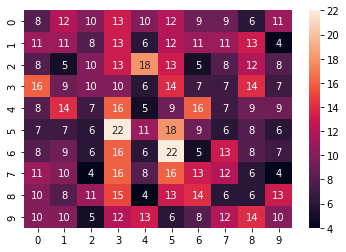

In [49]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(true_classes,predicted_classes),annot=True,fmt='.5g') 

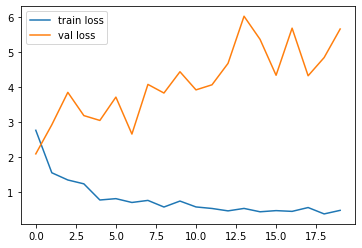

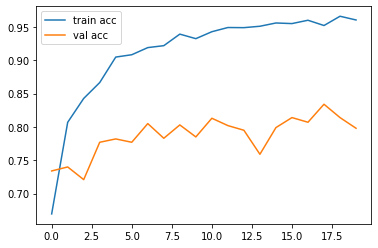

<Figure size 432x288 with 0 Axes>

In [29]:
# plot the loss
plt.plot(transfer_inception.history['loss'], label='train loss')
plt.plot(transfer_inception.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(transfer_inception.history['accuracy'], label='train acc')
plt.plot(transfer_inception.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#### Prediction

In [30]:
y_pred_incep=inception_model.predict(test_set)

**The predicted output is a probability due to the activation funtion Softmax, it returns probability of the classes
We will now change the probability to discrete values**

In [31]:
import numpy as np
y_pred_incep=np.argmax(y_pred_incep,axis=1)

**Saving the model**

In [32]:
inception_model.save("Tomato_inceptionv3.h5")
from tensorflow.keras.models import load_model
modelinception=load_model("Tomato_inceptionv3.h5")

**Testing the Model with validation dataset** 

Saving Healthy_Tomato.JPG to Healthy_Tomato (1).JPG
Tomato___healthy


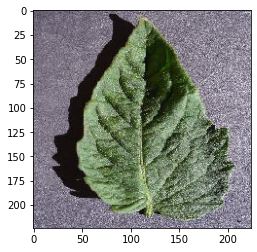

In [61]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  # predict images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis =0)

  preds = modelinception.predict(x)
  preds=np.argmax(preds, axis=1)
  if preds==0:
        preds="Tomato___Bacterial_spot"
  elif preds==1:
        preds="Tomato___Early_blight"
  elif preds==2:
        preds="Tomato___healthy"
  elif preds==3:
        preds="Tomato___Late_blight"
  elif preds==4:
        preds="Tomato___Leaf_Mold"
  elif preds==5:
        preds="Tomato___Septoria_leaf_spot"
  elif preds==6:
        preds="Tomato___Spider_mites Two-spotted_spider_mite"
  elif preds==7:
        preds="Tomato___Target_Spot"
  elif preds==8:
        preds="Tomato___Tomato_mosaic_virus"
  else:
        preds="Tomato___Tomato_Yellow_Leaf_Curl_Virus"
  print(preds)
  plt.imshow(img)

### VGG16

VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes.



In [34]:
from tensorflow import keras 
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model, Sequential,load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [35]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=True,shear_range=.2,rotation_range=.2)
test_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory("/content/drive/MyDrive/BTP_Dataset/dataset/tomato/train/",
                                               target_size=(224,224),class_mode="categorical",batch_size=50,shuffle=True)
test_set=test_datagen.flow_from_directory("/content/drive/MyDrive/BTP_Dataset/dataset/tomato/val/",
                                          target_size=(224,224),batch_size=50,class_mode="categorical",shuffle=True)

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [50]:
vgg16=VGG16(include_top=False,weights="imagenet",input_shape=[224,224,3])

**We will not train the layers because the layers of VGG16 layers are already trained with imagenet dataset.** 

In [51]:
for layer in vgg16.layers:
  layer.trainable=False

In [52]:
folder=glob("/content/drive/MyDrive/BTP_Dataset/dataset/tomato/train/*")
folder

['/content/drive/MyDrive/BTP_Dataset/dataset/tomato/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/BTP_Dataset/dataset/tomato/train/Tomato___Early_blight',
 '/content/drive/MyDrive/BTP_Dataset/dataset/tomato/train/Tomato___healthy',
 '/content/drive/MyDrive/BTP_Dataset/dataset/tomato/train/Tomato___Late_blight',
 '/content/drive/MyDrive/BTP_Dataset/dataset/tomato/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/BTP_Dataset/dataset/tomato/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/BTP_Dataset/dataset/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/BTP_Dataset/dataset/tomato/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/BTP_Dataset/dataset/tomato/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/BTP_Dataset/dataset/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus']

**Adding a flatten layer along with a Dense layer whose neuron will be equal to the number of classes with and activation funtion softmax**

**Then we will concat the model and name vgg16_model**

In [53]:
x=Flatten()(vgg16.output)
pred_vgg16=Dense(units=len(folder),activation="softmax")(x)
vgg16_model=Model(inputs=vgg16.input,outputs=pred_vgg16)

**We have taken the optimizer Adam and the loss will be categorical crossentropy and our aim will be to find the accuracy**

In [54]:
vgg16_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

#### Final Architecture

In [55]:
vgg16_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

**Train the model with an epoch of 20 and the validation data will be the test data**

In [62]:
transfer_vgg16=vgg16_model.fit_generator(training_set,validation_data=test_set,epochs=20,
                                         validation_steps=len(test_set),steps_per_epoch=len(training_set))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
200/200 [==============================] - 183s 913ms/step - loss: 0.4282 - accuracy: 0.8617 - val_loss: 0.5826 - val_accuracy: 0.7950
Epoch 2/20
200/200 [==============================] - 181s 905ms/step - loss: 0.2777 - accuracy: 0.9102 - val_loss: 0.5695 - val_accuracy: 0.8210
Epoch 3/20
200/200 [==============================] - 181s 905ms/step - loss: 0.2378 - accuracy: 0.9246 - val_loss: 0.4547 - val_accuracy: 0.8520
Epoch 4/20
200/200 [==============================] - 179s 895ms/step - loss: 0.1722 - accuracy: 0.9478 - val_loss: 0.4818 - val_accuracy: 0.8540
Epoch 5/20
200/200 [==============================] - 179s 892ms/step - loss: 0.1375 - accuracy: 0.9579 - val_loss: 0.5049 - val_accuracy: 0.8550
Epoch 6/20
200/200 [==============================] - 179s 893ms/step - loss: 0.1004 - accuracy: 0.9728 - val_loss: 0.4457 - val_accuracy: 0.8650
Epoch 7/20
200/200 [==============================] - 178s 888ms/step - loss: 0.0901 - accuracy: 0.9751 - val_loss: 0.5474 -

After the training I have noticed that the model is not **overfit and the loss and accuracy is somewhat equal to validation loss and validation accuracy.**

Which means the model will perform good

In [72]:
# Scores is just a list containing loss and accuracy value
scores=vgg16_model.evaluate(training_set)
scores2=vgg16_model.evaluate(test_set)
print("Training Loss is :"+str(scores[0]))
print("Training Accuracy is :"+str(scores[1]*100)+" %")
print("Validation Loss is :"+str(scores2[0]))
print("Validation Accuracy is :"+str(scores2[1]*100)+" %")

20/20 [==============================] - 10s 511ms/step - loss: 0.5403 - accuracy: 0.8600
Training Loss is :0.01197982020676136
Training Accuracy is :99.88999962806702 %
Validation Loss is :0.5402804017066956
Validation Accuracy is :86.00000143051147 %


In [ ]:
test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)
predictions = vgg16_model.predict(test_set, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes and class Labels
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())   

In [76]:
#Classification Report
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.15      0.15      0.15       100
                        Tomato___Early_blight       0.06      0.06      0.06       100
                         Tomato___Late_blight       0.13      0.10      0.11       100
                           Tomato___Leaf_Mold       0.12      0.17      0.14       100
                  Tomato___Septoria_leaf_spot       0.06      0.05      0.05       100
Tomato___Spider_mites Two-spotted_spider_mite       0.10      0.13      0.11       100
                         Tomato___Target_Spot       0.09      0.09      0.09       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.10      0.09      0.09       100
                 Tomato___Tomato_mosaic_virus       0.08      0.08      0.08       100
                             Tomato___healthy       0.08      0.06      0.07       100

                                     accu

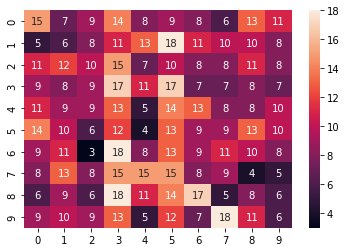

In [77]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(true_classes,predicted_classes),annot=True,fmt='.5g') 

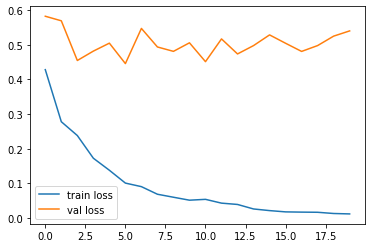

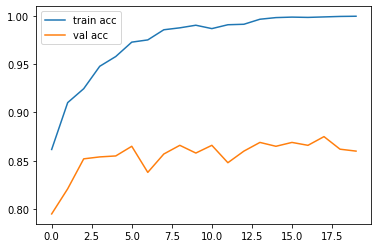

<Figure size 432x288 with 0 Axes>

In [75]:
# plot the loss
plt.plot(transfer_vgg16.history['loss'], label='train loss')
plt.plot(transfer_vgg16.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(transfer_vgg16.history['accuracy'], label='train acc')
plt.plot(transfer_vgg16.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#### Prediction

In [68]:
y_pred_vgg16=vgg16_model.predict(test_set)

**The predicted output is a probability due to the activation funtion Softmax, it returns probability of the classes
We will now change the probability to discrete values**

In [69]:
import numpy as np
y_pred_vgg16=np.argmax(y_pred_vgg16,axis=1)

**Saving the model**

In [70]:
vgg16_model.save("Tomato_vgg16.h5")
from tensorflow.keras.models import load_model
modelvgg16=load_model("Tomato_vgg16.h5")

**Testing the Model with validation dataset** 

Saving Inception-V3.JPG to Inception-V3.JPG
Tomato___Target_Spot


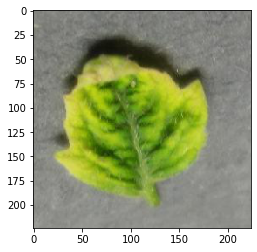

In [71]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  # predict images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis =0)

  preds = modelvgg16.predict(x)
  preds=np.argmax(preds, axis=1)
  if preds==0:
        preds="Tomato___Bacterial_spot"
  elif preds==1:
        preds="Tomato___Early_blight"
  elif preds==2:
        preds="Tomato___healthy"
  elif preds==3:
        preds="Tomato___Late_blight"
  elif preds==4:
        preds="Tomato___Leaf_Mold"
  elif preds==5:
        preds="Tomato___Septoria_leaf_spot"
  elif preds==6:
        preds="Tomato___Spider_mites Two-spotted_spider_mite"
  elif preds==7:
        preds="Tomato___Target_Spot"
  elif preds==8:
        preds="Tomato___Tomato_mosaic_virus"
  else:
        preds="Tomato___Tomato_Yellow_Leaf_Curl_Virus"
  print(preds)
  plt.imshow(img)

# Misc

In [ ]:
# fit the model, it will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

In [ ]:
# Scores is just a list containing loss and accuracy value
scores=r.evaluate(train_generator)
scores2=r.evaluate(test_generator)
print("Training Loss is :"+str(scores[0]))
print("Training Accuracy is :"+str(scores[1]*100)+" %")
print("Testing Loss is :"+str(scores2[0]))
print("Testing Accuracy is :"+str(scores2[1]*100)+" %")

In [ ]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = r.predict(test_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes and class Labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   

In [ ]:
#Classification Report
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(true_classes,predicted_classes),annot=True,fmt='.5g') 

In [ ]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')